<a href="https://colab.research.google.com/github/SmritiSalujaa/hotel-booking-analysis/blob/main/Copy_of_Final_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Abstract
This data article describes two datasets with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. Both datasets share the same structure, with 32 variables describing the 40,060 observations of resort hotel and 79,330 observations of city hotel.The distance between these two locations is 280 km and both locations border on the north atlantic. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017.
We will perform exploratory data analysis with python to get insight from the data.

# ANSWERED QUESTIONS
<b>Hotel wise Analysis
1. Which hotel is mostly booked by customers?
2. How long does people stay in the hotels?
3. How does lead time effects cancelation of hotel ?
4. What are the hotel prefrences of distributors?

<b>Booking Analysis
5. Which is the most common customer_type ?
6. Which country has the highest booking ?
7. what are the effects of deposit on bookings ?
8. Is assigned room type the causes for high cancelation?

<b>Market Analysis
9. Which segment of the market usually has the least number on the waiting list?
10. Which segment of the Distribution_channel usually has the least number on  the waiting list?
11. Which hotel is mostly preferred by Distributors ?

<b>Time Analysis
12. How average daily rate (adr) changes with different months ?
13. What is the busiest month of the year?
14. Which is most preferred weekdays or weekends ?
15. How average daily rate (adr) changes with Customer Type ?
16. what is the chances of repeated guest cancelling the booking ?
17. which segemnt of distribution channel have highest bookings and cancelations?
18. which market_segment have highest bookings and cancelations?
19. Which type of rooms are mostly reserved ?
20. Which type of rooms are mostly assigned ?


In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import plotly.express as px
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [2]:
#mounted the drive
from google.colab import drive                                                                                                                                                                                                                                                                                                                                                                                                                                                                
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the dataset
hotel_data=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

Exploring dataset

In [ ]:
#viewing the data
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#viewing tail
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#checking the columns and rows
hotel_data.shape

(119390, 32)

In [ ]:
#checking the data
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking the data types
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Checking the values of different column

In [ ]:
hotel_data['arrival_date_year'].unique().tolist()


[2015, 2016, 2017]

In [ ]:
len(hotel_data['country'].unique().tolist())


178

In [ ]:
hotel_data['meal'].unique().tolist()

['BB', 'FB', 'HB', 'SC', 'Undefined']

In [ ]:
hotel_data['market_segment'].unique().tolist()


['Direct',
 'Corporate',
 'Online TA',
 'Offline TA/TO',
 'Complementary',
 'Groups',
 'Undefined',
 'Aviation']

In [ ]:
hotel_data['distribution_channel'].unique().tolist()

['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']

In [ ]:
hotel_data['customer_type'].unique().tolist()

['Transient', 'Contract', 'Transient-Party', 'Group']

# **Data Cleaning**

In [ ]:
#dropping unnecessary column
hotel_data=hotel_data.drop(columns = ["company","reservation_status_date","arrival_date_week_number"])


The columns “agent” and “company” have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.

In [ ]:
#checkimg the null values
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
#checking total null values
hotel_data.isnull().sum().sort_values()

hotel                                 0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
total_of_special_requests             0
distribution_channel                  0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
arrival_date_month                    0
arrival_date_year                     0
lead_time                             0
is_canceled                           0
market_segment                        0


In [ ]:
#dropping nullvalues
hotel_data=hotel_data.dropna()

In [ ]:
#checking the shape
hotel_data.shape

(102894, 29)

In [ ]:
#recheckimg the data
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#the statistical overview of the data
hotel_data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000
mean,0.390314,111.740092,2016.156977,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458
std,0.487823,107.681013,0.706117,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


Analysing the data

# **Hotel wise Analysis**

1. *Which hotel is mostly booked by customers?*

In [ ]:
#total counts of resort hotel
rh=hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel")]

In [ ]:
#total counts of city hotel
ch =hotel_data.loc[(hotel_data["hotel"] == "City Hotel")]

In [ ]:
#checking the count of resort hotel
rh.shape

(31713, 29)

In [ ]:
#checking the count of city hotel
ch.shape

(71181, 29)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

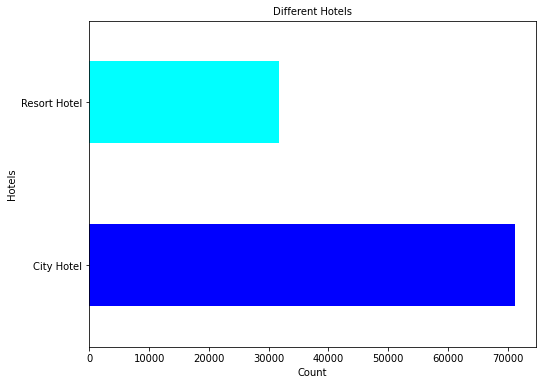

In [ ]:
#checking the demand of hotel
plt.figure(figsize=[8,6])

hotel_data.groupby('hotel')['hotel'].count().plot.barh(color=['Blue','Cyan'])

plt.title('Different Hotels', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Hotels', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


Around 69.2% bookings are of City hotel and 30.8% bookings are for Resort hotel.
 
 By this we can say that city hotel is most preferred hotel.

<b>2. How long does people stay in the hotels?

In [ ]:
#storing the the cancelation values
Resort = hotel_data.loc[(hotel_data["hotel"] == "Resort Hotel") & (hotel_data["is_canceled"] == 0)]
City = hotel_data.loc[(hotel_data["hotel"] == "City Hotel") & (hotel_data["is_canceled"] == 0)]

In [ ]:
Resort.shape

(22029, 29)

In [ ]:
City.shape

(40704, 29)

In [ ]:
#length of stay
Resort["total_nights"] = Resort["stays_in_weekend_nights"] + Resort["stays_in_week_nights"]
City["total_nights"] = City["stays_in_weekend_nights"] + City["stays_in_week_nights"]

num_nights_res = list(Resort["total_nights"].value_counts().index)
num_bookings_res = list(Resort["total_nights"].value_counts())
rel_bookings_res = Resort["total_nights"].value_counts() / sum(num_bookings_res) *100 # convert to percent

num_nights_cty = list(City["total_nights"].value_counts().index)
num_bookings_cty = list(City["total_nights"].value_counts())
rel_bookings_cty = City["total_nights"].value_counts() / sum(num_bookings_cty) *100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


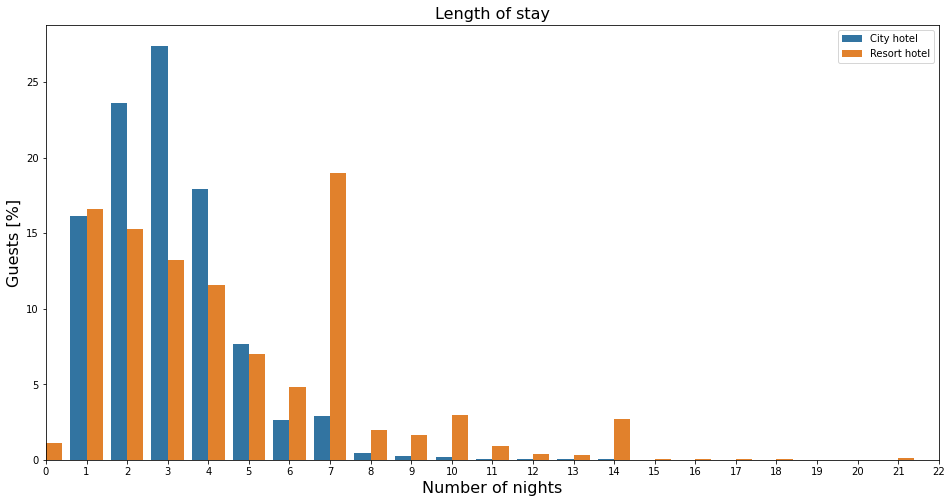

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

On average, guests of the City hotel stay 3 nights.
On average, guests of the Resort hotel stay 4 nights
For the city hotel there is a clear preference for 1-4 nights.
For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.

<b>3. How does lead time effects cancelation of hotel?

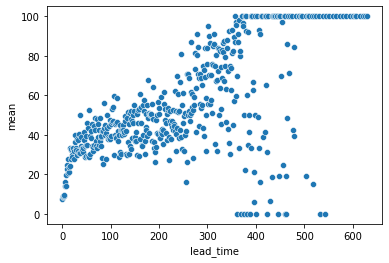

In [ ]:
#comparing lead time with cancelation 
a = hotel_data.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

Text(0.5, 1.0, 'Cancelation vs Booking')

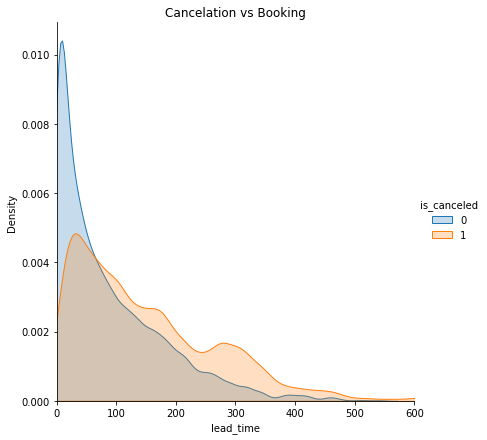

In [ ]:
#Relationship of lead time with cancellation  (booking was canceled (1) or not canceleld (0))
(sns.FacetGrid(hotel_data, hue = 'is_canceled',
             height = 6,
             xlim = (0,600))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend())
plt.title('Cancelation vs Booking')



 Lead time has a positive correlation with cancellation. i.e as lead time increases there is high chance of canceling the booking.
 Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often. 
 

# **Booking Analysis**

<b>5. Which country has the highest booking?

In [ ]:
#booking of top 20 countries

top_countries = list(hotel_data.country.value_counts().head(20).index)

fig = px.histogram(hotel_data[hotel_data.country.isin(top_countries)],
             x='country',
             color='is_canceled',
             facet_col='hotel')
fig.update_layout(bargap=0.1)
fig.update_layout(title='Bookings by countries (Top 20)')

fig.show()

Most guests are from Portugal followed by United Kingdom and other countries in Europe ,as both the hotels are located in Portugal the number of people from portugal is highest.

<b>6. Which hotel have high cancelation ration ?



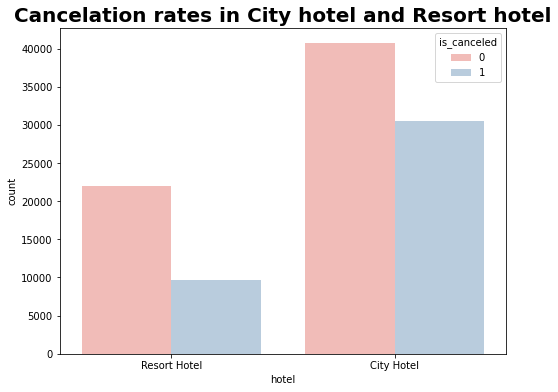

In [ ]:
#checking the cancelation rate of each hotel
plt.figure(figsize=(8, 6))

sns.countplot(x='hotel',hue="is_canceled", data=hotel_data,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

As we can see resort hotel total bookings were 31713 and city hotel total bookings were 71181.
And the cancelations for resort hotel is 9684 and city hotel is 30477. 
i.e 30.53% and 42.81% of people are canceling from resort and city hotel 
Instead of its high cancelation ratio city hotel have 54% more non canceled bookings.

<b>7. what are the effects of deposit on bookings ?

In [ ]:
#avg_deposit= hotel_data.groupby("deposit_type").mean()
#avg_deposit

hotel=hotel_data.loc[:9]
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
7,Resort Hotel,0,9,2015,July,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2015,July,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled
9,Resort Hotel,1,75,2015,July,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled


Text(0.5, 1.0, 'Type of deposit  effecting Cancelation')

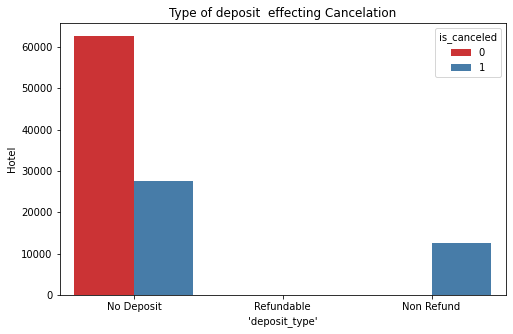

In [ ]:

d = hotel_data['deposit_type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.countplot(x='deposit_type', hue='is_canceled', data=hotel_data[hotel_data['deposit_type'].isin(d.index)],palette='Set1')
plt.xlabel("'deposit_type'")
plt.ylabel("Hotel")
plt.title("Type of deposit  effecting Cancelation")

There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to canceling of the bookings.

It is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

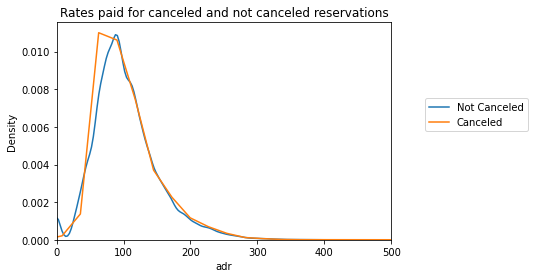

In [ ]:
plt.xlim(0, 500)
sns.kdeplot(data = hotel_data[hotel_data['is_canceled'] == 0], x = 'adr', label = 'Not Canceled') 
sns.kdeplot(data = hotel_data[hotel_data['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

<b>8. Is assigned room type the causes for high cancelation?

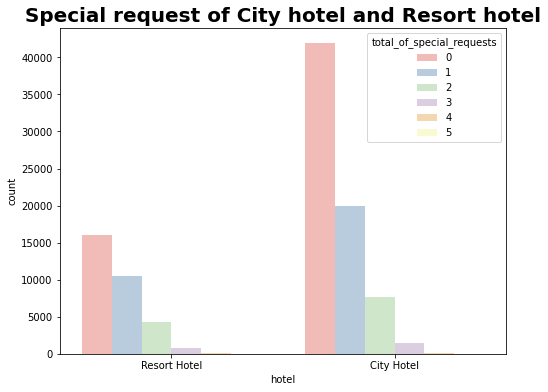

In [ ]:
#number of special requests each hotel received
plt.figure(figsize=(8, 6))

sns.countplot(x='hotel',hue="total_of_special_requests", data=hotel_data,palette='Pastel1')
plt.title("Special request of City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

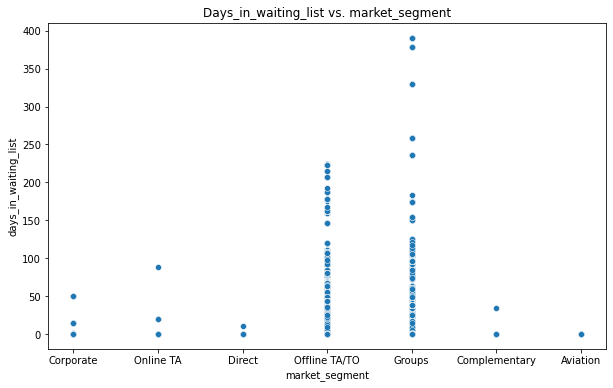

In [ ]:
#checked the waiting time for each segment
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="market_segment", y="days_in_waiting_list", data=hotel_data)
ax.set_title("Days_in_waiting_list vs. market_segment")
ax.set_xlabel("market_segment")
ax.set_ylabel('days_in_waiting_list')
plt.show()


We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.
Less than 2% of people want to cancel there bookings due to alloted room.
 

## **Market Analysis**

<b>9. Which segment of the market usually has the least number on the waiting list?

In [ ]:
#

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.
While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.
And aviation has the least waiting list days, as there will be people who are pilots and cabin crew followed by remaining segments.

10. Which segment of the Distribution_channel usually has the least number on the waiting list?

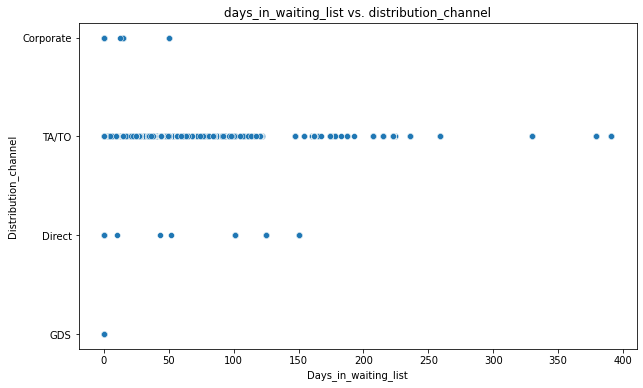

In [ ]:
#checked the waiting time for each distribution channel
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="days_in_waiting_list", y="distribution_channel", data=hotel_data,palette='Set3')
ax.set_title("days_in_waiting_list vs. distribution_channel")
ax.set_ylabel("Distribution_channel")
ax.set_xlabel('Days_in_waiting_list')
plt.show()

As we can see that  global distribution systems (GDS) has the least waiting list followed by corporate and direct channel. And the highest waiting list goes for TA/TO which can extend upto 400 days.

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

hotel_data['same_room_not_alloted'] = hotel_data.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = hotel_data.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.title('Room allotments vs cancelation ')
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded. Less than 2% of people want to cancel there bookings due to alloted room.

11. Which hotel is mostly preferred by Distributors ?



Text(0.5, 1.0, 'Hotel Preference by Distributors')

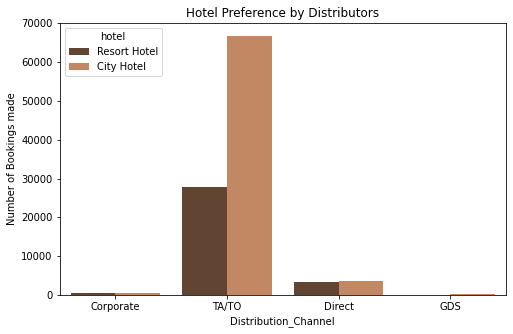

In [ ]:
#hotel preference by customer type

plt.figure(figsize=(8,5))
sns.countplot(x='distribution_channel', hue='hotel', data=hotel_data,palette='copper')
plt.xlabel("Distribution_Channel")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by Distributors")

City hotel has more revnue generating deals by TA/TO channel followed by direct channel.
as for resort hotel more revnue generating deals are made from TA/TO channel followed by direct channel. The preferred hotel have less infulence when direct booking than by TA/TO.

### **Time Analysis**

12. How average daily rate (adr) changes with different months ?

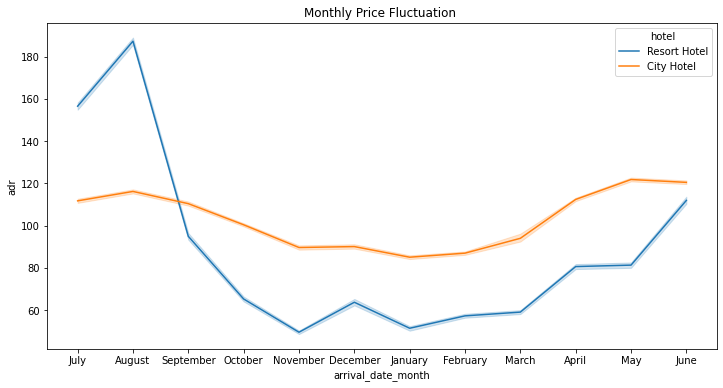

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_data)

plt.title('Monthly Price Fluctuation ')
plt.show()

This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel  is more during March, April & May.
Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

13. What is the busiest month of the year?

In [ ]:
hotel_data['total_guests']=hotel_data['adults']+hotel_data['babies']+hotel_data['children']

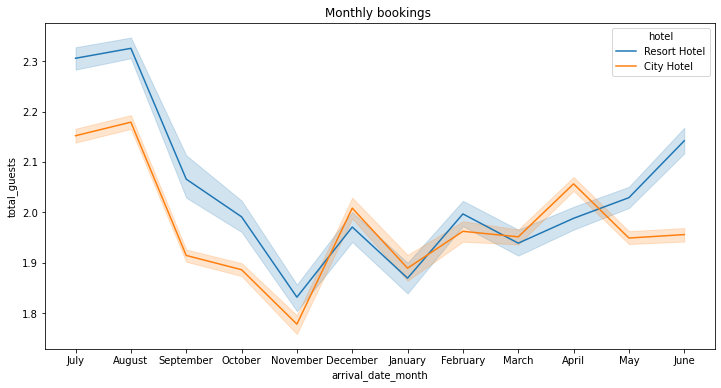

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='total_guests', hue='hotel', data= hotel_data)
plt.title('Monthly bookings ')
plt.show()

The city hotel and resort hotel has its peak guest values in the month of auguest. The resort hotel has more guests during july and august, when the prices are also highest.
Guest numbers for the Resort hotel go down slighty from September. Both hotels have the fewest guests during the winter i.e November, even when price are lowest.



14. Which is most preferred weekdays or weekends ?

In [ ]:
hotel_data_Notcanceled = hotel_data[hotel_data['is_canceled'] == 0]

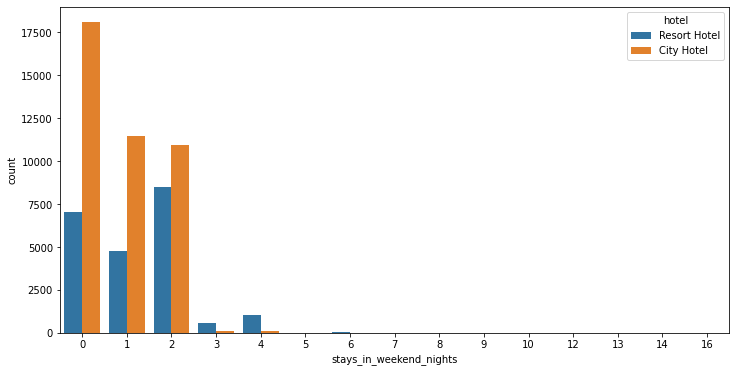

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_weekend_nights',hue='hotel')

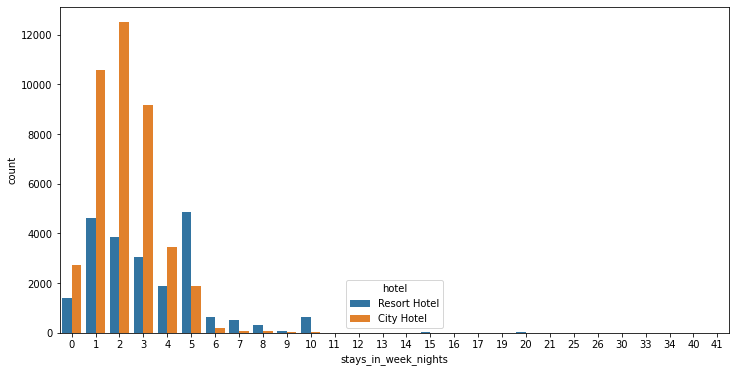

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data=hotel_data_Notcanceled,x='stays_in_week_nights',hue='hotel')

As we can see from the both the graphs majority of the pople from city hotel tends to stay 0 weekend nights followed by 1 and 2 weekend nights ,very few people tends to stay longer than that, and many people tend to stay 1 to 3 days on an avg. In case of resort hotel  people tends to stay at least 2 weekends days,and most people tend to stay atleast 4 days.


<b>4. Which is the most common customer_type ?

Text(0, 0.5, 'Number of Bookings')

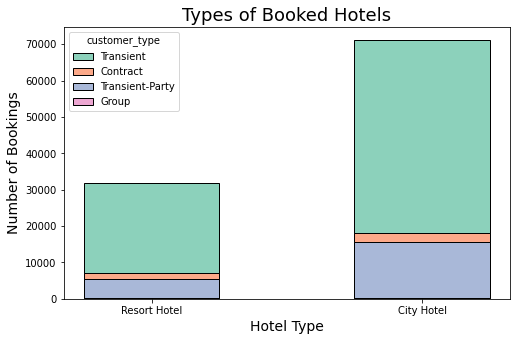

In [ ]:
#booking prefernce of the customers
plt.subplots(figsize = (8,5))
sns.histplot(data = hotel_data, x = "hotel",palette = "Set2", hue = "customer_type", multiple = "stack", shrink = 0.5)
plt.title("Types of Booked Hotels", fontsize = 18)
plt.xlabel("Hotel Type", fontsize = 14)
plt.ylabel("Number of Bookings", fontsize = 14)


The most common type of customer are Transient type followed by Transient-Party.
And the less common type is Group type followed by Contract type.

15. How average daily rate (adr) changes with Customer Type ?

Text(0.5, 0, 'Type of Customer')

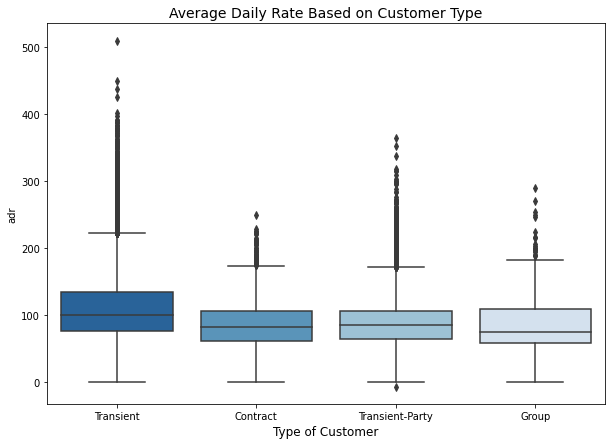

In [ ]:
fig = plt.subplots(figsize = (10,7))
c= sns.boxplot(data = hotel_data[hotel_data["adr"]<1000], x = "customer_type", y = "adr", palette = "Blues_r")
c.set_title("Average Daily Rate Based on Customer Type", fontsize = 14)
c.set_xlabel("Type of Customer", fontsize = 12)

As we can see that contract customer type has the least average daily rate(adr)followed by group and transient-Party and the highest average daily rate(adr) is for transient customer type.

<b>16.  what is the chances of repeated guest cancelling the booking ?
 

Text(0.5, 1.0, 'Cancellations by repeated guests')

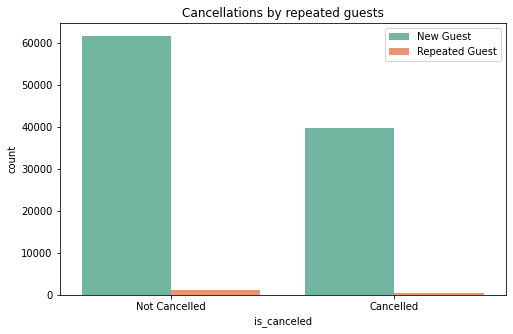

In [ ]:
#cancelation ny repeated guests
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel_data, palette='Set2')
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

As we can see most of repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

<b>17. which segemnt of distribution channel have highest bookings and cancelations?

Text(0.5, 1.0, 'Bookings by distribution channel')

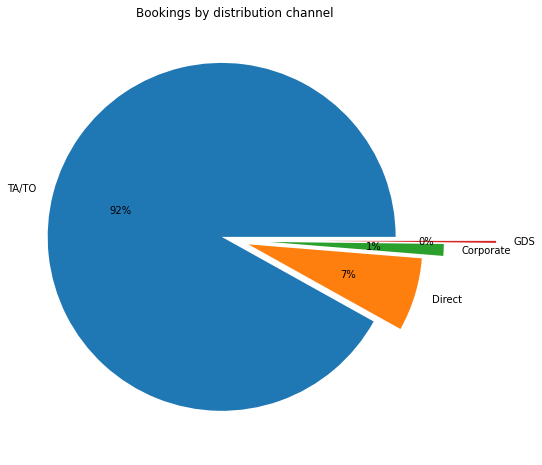

In [ ]:
#checking booking ratio of distribution channel
d = hotel_data['distribution_channel'].value_counts()
plt.figure(figsize=(10,8))
p = plt.pie(d ,labels=d.index,explode=[0.08,0.08,0.2,0.5],autopct="%.0f%%")
plt.title("Bookings by distribution channel")

TA/TO has highest booking of 92% and  cancellation of 7% followed by direct distribution channel.

Text(0.5, 1.0, 'Cancelation by distribution_channel')

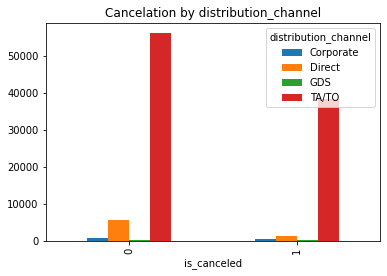

In [ ]:
#checking cancelation rate of the distribution channel
d=hotel_data.groupby(['is_canceled','distribution_channel']).size()
d=d.unstack()
d.plot(kind='bar')
plt.title("Cancelation by distribution_channel")

Similary booking made by TA/TO has highest cancelations

<b>18. which market_segment have highest bookings and cancelations?

Text(0.5, 1.0, 'Bookings by market_segment')

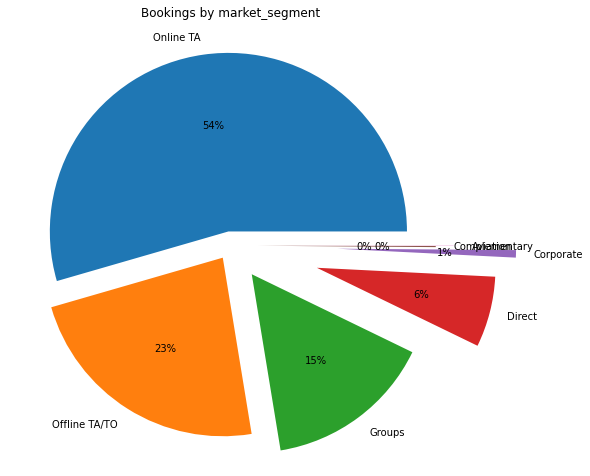

In [ ]:
#checking booking ratio of the market segment
d = hotel_data['market_segment'].value_counts()
plt.figure(figsize=(8,12))
p = plt.pie(d, labels=d.index,explode=[0.08,0.08,0.2,0.5,0.6,0.15,0.25],autopct="%.0f%%")
plt.title("Bookings by market_segment")

Text(0.5, 1.0, 'Cancelation by market_segment')

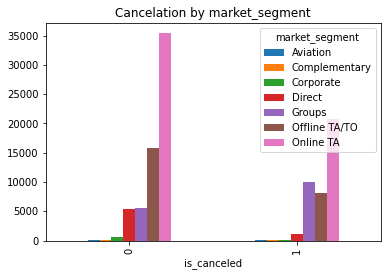

In [ ]:
#checking cancelation rate of the market segment
d=hotel_data.groupby(['is_canceled','market_segment']).size()
d=d.unstack()
d.plot(kind='bar')
plt.title("Cancelation by market_segment")

Offline TA/TO (Travel Agents/Tour Operators) and Online TA has booking rates of 23% and 54%, cancellation rate of 33.8% and 36.9%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that Group segment has booking rate of 15.2% and a cacelation rate of 35%. 

<b>19. Which type of rooms are mostly reserved ?

Text(0.5, 1.0, 'Types of Rooms reserved')

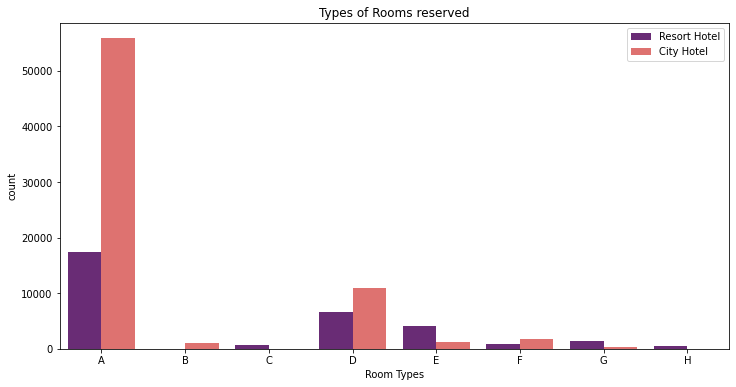

In [ ]:
rooms=sorted(hotel_data['reserved_room_type'].unique())
#reserved room type
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=hotel_data, order=rooms,palette='magma')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")

As we can see that mostly reserved rooms are A and D types .

<b>20. Which type of rooms are mostly Assigned ?

Text(0.5, 1.0, 'Types of Rooms Assigned')

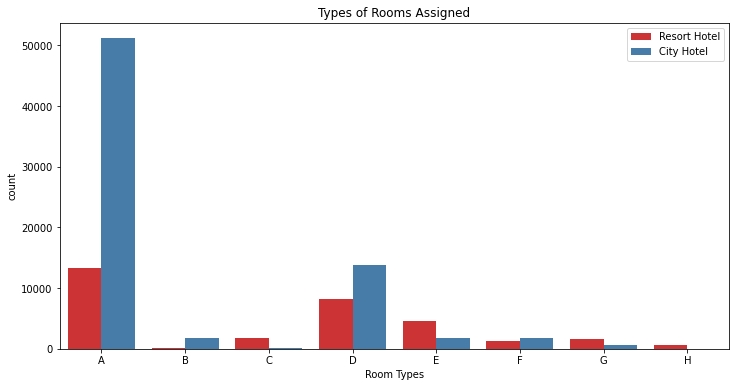

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='assigned_room_type', hue='hotel', data=hotel_data, order=rooms,palette='Set1')
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms Assigned")

As we can see the most assigned rooms are A and D followed by E.

Finding different correlations:

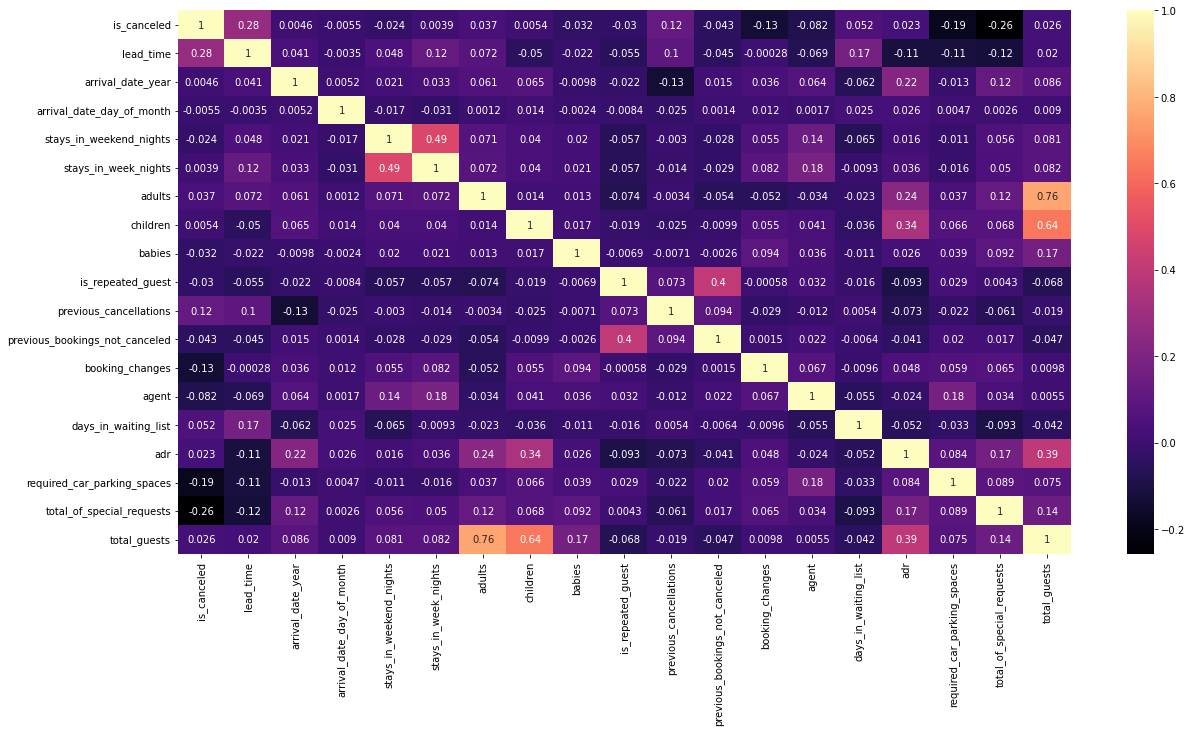

In [ ]:
plt.figure(figsize=(20,10))
c=hotel_data.corr()
sns.heatmap(c,cmap='magma',annot=True)


We can see that lead_time and previous_cancellations have a higher correlation with is_cancelled whereas booking changes,same room not alloted and total special requests are negetively corelated


<b> CONCLUSIONS 

1. The City hotel is the most preferred hotel.
2. On an average, guests of City hotel stay 3 nights and guests of the Resort hotel stay 4 nights.
3. As lead time increases there is a high chance of canceling the booking.
4. The most common type of customer are Transient type followed by Transient-Party.
5. Most guests are from Portugal, as the hotels resides in that place.
6. The highest cancellation ration of bookings is done in City hotel.But city hotel have 54% more non canceled bookings compared to resort hotel.
7. There was no deposit for City hotel where as Resorts had some deposits.It is interesting to note that non-refundable deposits had more cancellation than refundable deposits.
8. Not getting same room as demanded is not the case of cancellation of rooms.
9. When taking market segment into consideration Aviation has the least waiting list days and TA/TO has the highest waiting list days.
10. When taking distribution channel into consideration global distribution systems (GDS) has the least waiting list followed by corporate and direct channel.
11. Both city hotel and resort hotel has more revnue generating deals by TA/TO channel followed by direct channel.
12. The prices in the Resort Hotel are much higher during the summer and prices of city hotel is more during March, April & May.
13. The city hotel and resort hotel has its peak guest in the month of auguest.
14.  The majority of the people from city hotel tends to stay 0 weekend nights and the majority of the people from resort hotel tends to stay 2 weekends days.
15. The contract customer type has the least average daily rate(adr)followed by group and transient-Party and the highest average daily rate(adr) is for transient customer type.
16. Most of the repeated guests do not cancel their reservations and most of the customers are not repeated guests.
17.  With respect to market segment Online TA has the highest booking of 54% and cancellation of 36.9% followed by Offline TA/TO.
18.  With respect to distribution channel TA/TO has highest booking of 91% and cancellation of 40% followed by direct distribution channel.
19. The mostly reserved rooms are A and D types and most assigned rooms are A and D followed by E.
20. The lead_time and previous_cancellations have a higher correlation with is_cancelled than most of the other columns.